In [1]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [3]:
# Step 2: Load Dataset
data = pd.read_csv("adult 3.csv") 
print("Original shape:", data.shape)

Original shape: (48842, 15)


In [5]:
data


,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data.isna()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native-country     0
income             0
dtype: int64

In [11]:
print(data.occupation.value_counts())

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [13]:
print(data.gender.value_counts())

Male      32650
Female    16192
Name: gender, dtype: int64


In [15]:
print(data.education.value_counts())

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [17]:
data.occupation.replace({'?':'Others'},inplace = True)

In [19]:
print(data.occupation.value_counts())

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [21]:
data.workclass.replace({'?':'Notlisted'},inplace = True)

In [23]:
print(data['workclass'].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [25]:
data = data[data['workclass']!= 'Without-pay']
data = data[data['workclass']!= 'Never-worked']

In [27]:
print(data['workclass'].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: workclass, dtype: int64


In [29]:
data.shape

(48811, 15)

In [31]:
data = data[data['education']!= '5th-6th']
data = data[data['education']!= '1st-4th']
data = data[data['education']!= 'Preschool']

In [33]:
print(data.education.value_counts())

HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: education, dtype: int64


In [35]:
data.shape

(47972, 15)

In [37]:
data.drop(columns = ['education'],inplace = True)

In [39]:
data

,age,workclass,fnlwgt,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Notlisted,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


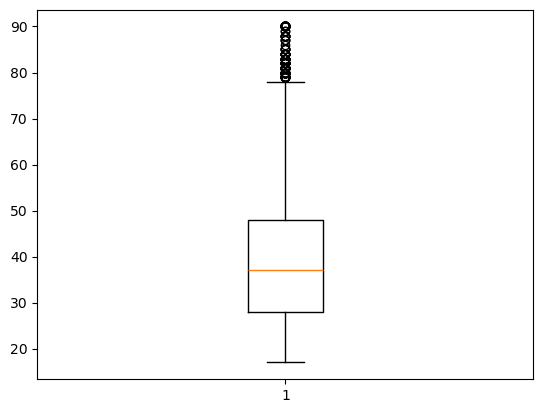

In [41]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [43]:
data = data[(data['age'] <= 75) & (data['age']>=17)]

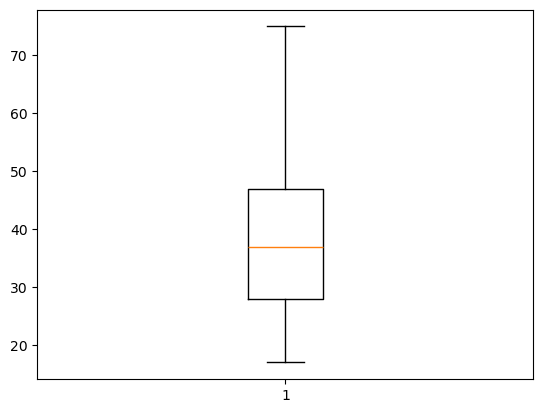

In [45]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [47]:
# Step 4: Separate Features and Target
X = data.drop('income', axis=1)
y = data['income']


In [49]:
#Step 5: Identify Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

In [51]:
print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
Numerical: ['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [53]:
#Step 6: Create Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave numerical columns as-is
)

In [55]:
#Step 7: Combine Preprocessing + Model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [57]:
#Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#Step 9: Train the Model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [61]:
#Step 10: Evaluate
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.8614


In [63]:
manual_input = pd.DataFrame([{
    'age': 39,
    'workclass': 'Private',
    'fnlwgt': 77516,
    'educational_num': 13,
    'marital_status': 'Never-married',
    'occupation': 'Adm-clerical',
    'relationship': 'Not-in-family',
    'race': 'White',
    'gender': 'Male',
    'capital_gain': 2174,
    'capital_loss': 0,
    'hours_per_week': 40,
    'native-country': 'United-States'
}])

In [65]:
manual_prediction = model_pipeline.predict(manual_input)
print("Prediction:", manual_prediction[0])

Prediction: <=50K


In [69]:
import joblib




In [71]:
# Step 11: Save Model & Columns
joblib.dump(model_pipeline, 'salary_model_pipeline.pkl')
joblib.dump(categorical_cols, 'categorical_columns.pkl')
joblib.dump(numerical_cols, 'numerical_columns.pkl')


['numerical_columns.pkl']